# This notebook is created a part of Coventry University's Machine Learning Coursework - 7072CEM
Dataset is accessible on https://www.kaggle.com/zynicide/wine-reviews

By Sunggu Choi

# Random Forest Regression

In [20]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [21]:
# Load required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

In [22]:
dataset = pd.read_csv('winemag_labeled.csv')
dataset_train = dataset.drop(['title_Cat','taster_name_Cat'],axis=1)

dataset_train

,points,price,country_Cat,designation_Cat,province_Cat,region_1_Cat,region_2_Cat,variety_Cat,winery_Cat
0,87,0.0,22,36806,331,424,11,690,11608
1,87,15.0,32,2325,108,792,11,450,12956
2,87,14.0,41,24511,268,1218,17,436,13018
3,87,13.0,41,27975,218,549,11,479,14390
4,87,65.0,41,36466,268,1218,17,440,14621
...,...,...,...,...,...,...,...,...,...
129966,90,28.0,17,4235,232,792,11,479,6643
129967,90,75.0,41,24511,268,787,10,440,4776
129968,90,30.0,15,17463,11,21,11,209,5929
129969,90,32.0,15,24511,11,21,11,436,6027


In [23]:
# 129971 rows and 10 feature inputs and 1 target output
dataset_train.shape

(129971, 9)

In [24]:
dataset_train.dtypes

points               int64
price              float64
country_Cat          int64
designation_Cat      int64
province_Cat         int64
region_1_Cat         int64
region_2_Cat         int64
variety_Cat          int64
winery_Cat           int64
dtype: object

In [25]:
X = dataset_train.drop('price', axis=1)
y = dataset_train['price']

In [26]:
# Construct pipeline
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [27]:
# Spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(103976, 8) (103976,)
(25995, 8) (25995,)


Decision Tree Regression model mean squared error: 0.3453288980213912
Mean Absolute Error: 12.394552878638107
Mean Squared Error: 1138.0680808493464
Root Mean Squared Error: 33.735264647685014


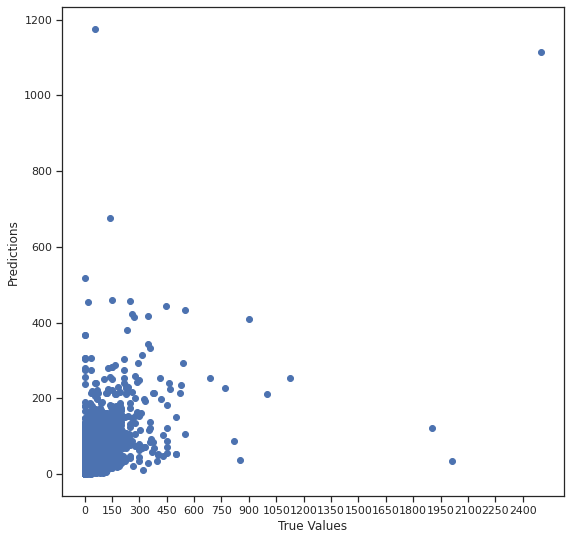

In [28]:
rfRegr = RandomForestRegressor(n_estimators=100, 
                             criterion='mse',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features='auto',
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_impurity_split=None,
                             bootstrap=True,
                             oob_score=False,
                             n_jobs=None,
                             random_state=None,
                             verbose=0, 
                             warm_start=False, ccp_alpha=0.0, max_samples=None)

rfRegrPipe = Pipeline([
     ('scaler', StandardScaler()),
     ('normalize', Normalizer()),
     ('regressor', rfRegr)
])
rfRegrPipe.steps

rfRegrModel = rfRegrPipe.fit(X_train, y_train) #model
y_pred = rfRegrPipe.predict(X_test) #Prediction

plt.figure(figsize=(9,9))
plt.scatter(y_test, y_pred)
plt.xticks(np.arange(0, 2500, step=150))
plt.xlabel('True Values')
plt.ylabel('Predictions')


mse = rfRegrPipe.score(X_test, y_test)

print("Decision Tree Regression model mean squared error:", mse)

from sklearn import metrics
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
# df

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


The absolute error is the difference between the predicted values and the actual values. 
Thus, the mean absolute error is the average of the absolute error.


The mean squared error or MSE is similar to the MAE, except you take the average of the squared differences between the predicted values and the actual values.

## Cross Validation

In [29]:
# Cross Validation Libraries

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

Cross-validated scores: [0.29214235 0.39631372 0.15966503 0.27656423 0.49796813 0.22198671]


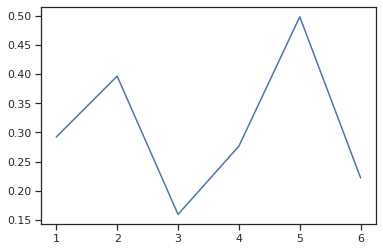

In [30]:
scores = cross_val_score(rfRegrModel, X, y, cv=6)
print ('Cross-validated scores:', scores)
plt.plot([1,2,3,4,5,6], scores)

[25.66119048 14.19608333 18.895      ... 29.174      22.8205
 15.2265    ]


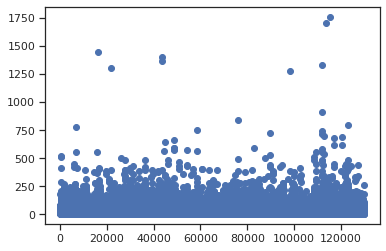

In [31]:
predictions = cross_val_predict(rfRegrModel, X, y, cv=6)
print(predictions)
plt.scatter(range(0,len(predictions)), predictions)

In [32]:
accuracy = metrics.r2_score(y, predictions)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.3044620591272813
